# Week 3 - Data Pre-procesing



## Data Visualisations Hands-on Practice

_Table of contents_

* Seaborn
* `pandas.DataFrame.plot()`
* Plotly (express)

## Background

Let's review together the [`matplotlib.figure.Figure`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.figure.Figure.html) and [`matplotlib.axes.Axes`](https://matplotlib.org/3.3.3/api/axes_api.html#the-axes-class) objects.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator



## I. Python `seaborn` library

We are going to start with the `seaborn` library.

In [5]:
import seaborn as sns
sns.set(style='ticks', font='Arial', font_scale=1.1)

### I.(a) `seaborn` plot properties

The `plotting_context` function returns a dictionary of the plot properties:

In [8]:
sns.plotting_context()

{'font.size': 13.200000000000001,
 'axes.labelsize': 13.200000000000001,
 'axes.titlesize': 13.200000000000001,
 'xtick.labelsize': 12.100000000000001,
 'ytick.labelsize': 12.100000000000001,
 'legend.fontsize': 12.100000000000001,
 'legend.title_fontsize': 13.200000000000001,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}

Plot properties can be configured with the `set_context()` function. For example, we can change the font size for all _text elements_ in a plot (ticks, labels, etc.):

In [11]:
sns.set_context(rc={'font.size': 16,})

### Best practices

1) Always set labels for the $x$ and $y$-axis, including the type of values

2) Always ensure your fonts are readable (at least as big as your text)

3) Always configure the range of values on an axis appropriately

### I.(b) `seaborn` library: Bar plots

Let's try an example:

/var/folders/r0/63whb4hs3bsdqdrfkkql5hb40000gn/T/ipykernel_78564/1924824215.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(), rotation=90, size=12)


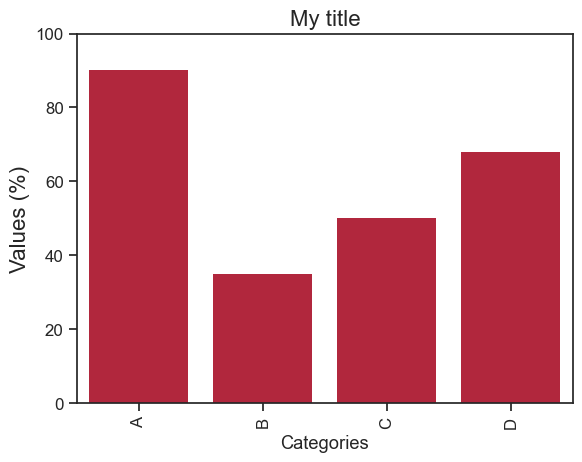

In [15]:
categories = ['A', 'B', 'C', 'D']
values = [90, 35, 50, 68]  # Assume percentages

sns.set_context(rc = {
    'patch.linewidth': 0,
})

graph = sns.barplot(x=categories, y=values, edgecolor='black', color='#C8102E')

# Set title (this is optional, as long as we specify a caption)
graph.set_title('My title', size=16)

# Always set labels for x and y axis. Labels should always include
# a metric when applicable (e.g., for numerical values)
graph.set_xlabel('Categories')
graph.set_ylabel('Values (%)', size=16)

# Configure the x-tick labels (e.g. rotate them)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, size=12)

# Always configure the range of the y-axis
graph.set(ylim=(0, 100));

### About colouring

The `color` argument in `seaborn` plot functions accepts Matplotlib color names:

|Letter|Name       |
|:----:|:----------|
| `b`  | `blue`    |
| `g`  | `green`   |
| `r`  | `red`     |
| `c`  | `cyan`    |
| `m`  | `magenta` |
| `y`  | `yellow`  |
| `k`  | `black`   |
| `w`  | `white`   |

You can also pass HEX or RGB color values (e.g. `#D4202F` or `(212, 32, 47)`). For an RGB tuple, convert numbers to floats by dividing by 255. E.g.:

```python
graph = sns.barplot(x=categories, y=values, edgecolor='black', color=(212/255, 32/255, 47/255))
```

#### Palettes

Seaborn has a number of built-in colour palettes: `pastel`, `muted`, `bright`, `deep`, `colorblind`, `dark` (see [here](https://seaborn.pydata.org/tutorial/color_palettes.html) for more information).

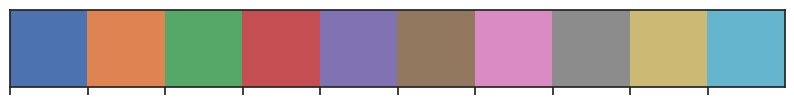

In [18]:
sns.palplot(sns.color_palette())

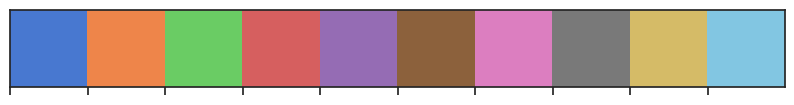

In [20]:
sns.set_palette("muted")
sns.palplot(sns.color_palette())

__Note.__ Assume we define our own _NU colour palette_ that contains black (`#000000`), white (`#FFFFFF`), red (`#C8102E`) and gold (`#A4804A`) colours.

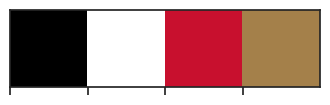

In [23]:
nuColors = ["#000000", "#FFFFFF", "#C8102E", "#A4804A"]

sns.set_palette(sns.color_palette(nuColors))
sns.palplot(sns.color_palette())


#### Using a DataFrame with the bar plots

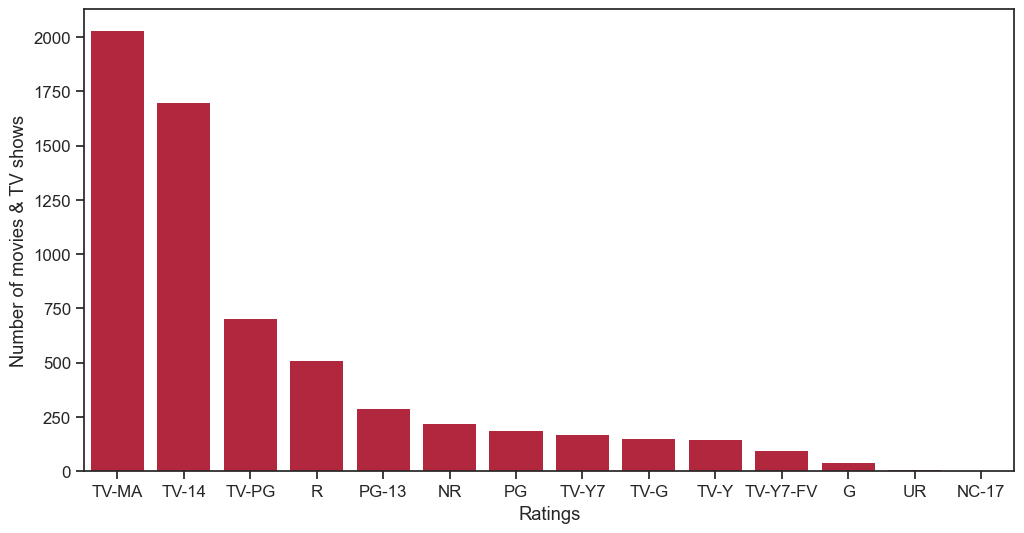

In [66]:
shows = pd.read_csv('shows.csv')

# Instead of a Series, let's try to keep data in a DataFrame object
df = shows.loc[:, ['id', 'rating']].groupby('rating').count()

# Sort in descending order the dataframe values.
df = df.sort_values(by='id', ascending=False)
df = df.reset_index()

# Configure figure size using matplotlib
plt.figure(figsize=(12, 6))

graph = sns.barplot(x='rating', y='id', data=df, color='#C8102E', edgecolor='k')

# Always set labels for x and y axis. Labels should always include
# a metric when applicable (e.g., for numerical values)
graph.set_xlabel('Ratings')
graph.set_ylabel('Number of movies & TV shows');

#### Plotting two groups

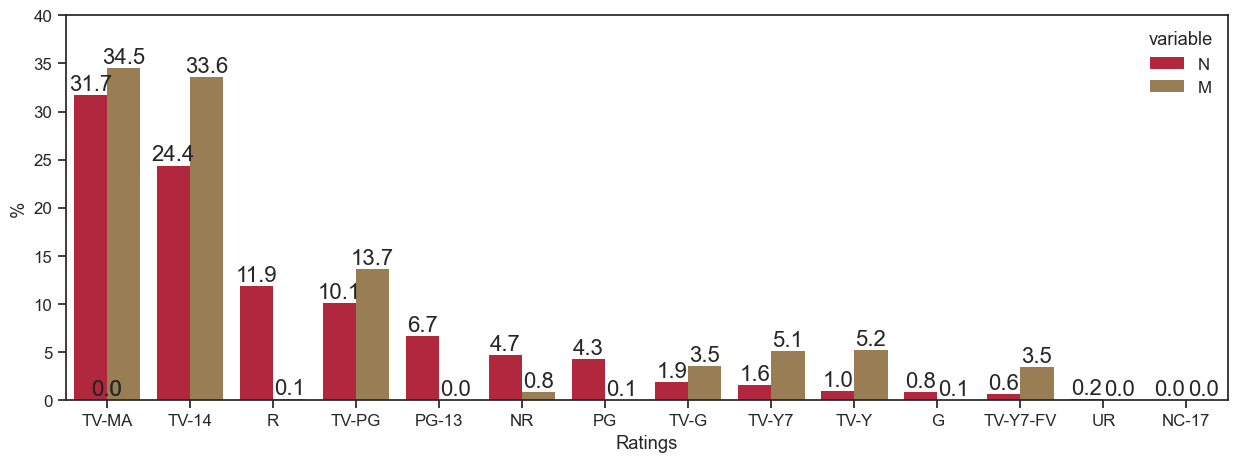

In [68]:
# Create a slice of dataframe values for movies.
movies = shows.loc[shows.type == 'Movie', ['id', 'rating']].groupby('rating').count().rename(columns={'id': 'N'})
# See here for method reset(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
movies = movies.reset_index()

# Create a slice of dataframe values for TV shows.
tv = shows.loc[shows.type == 'TV Show', ['id', 'rating']].groupby('rating').count().rename(columns={'id': 'M'})
tv = tv.reset_index()

# Neither data view contains a complete list of ratings. 
# Call function merge() to unify and create a complete list.
df = pd.merge(movies, tv, on='rating', how='outer')
# Replace NaN vslues with zeros.
df = df.fillna(0)
# Compute percentages.
df['N'] = df['N'] / df['N'].sum() * 100.0
df['M'] = df['M'] / df['M'].sum() * 100.0

df = df.sort_values(by='N', ascending=False)

# Call method melt()
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
data = pd.melt(df, id_vars='rating')

# Create a new plot figure.
plt.figure(figsize=(15,5))

# Create your own colours palette.
colors = ["#C8102E", "#A4804A"]
sns.set_palette(sns.color_palette(colors))

# Create the barplot.
graph = sns.barplot(x='rating', y='value', hue='variable', data=data, edgecolor='k')

# Create the bars labels.
for p in graph.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    value = '{:.1f}'.format(float(p.get_height()))
    graph.text(x, y, value, ha='center')

# set the x-axis label
graph.set_xlabel('Ratings')
# set the y-axis label
graph.set_ylabel('%')

# set appropriate y-axis limits to view the plot data.
graph.set(ylim=(0, 40));

#### Alternative way to draw the barplot

Try either:

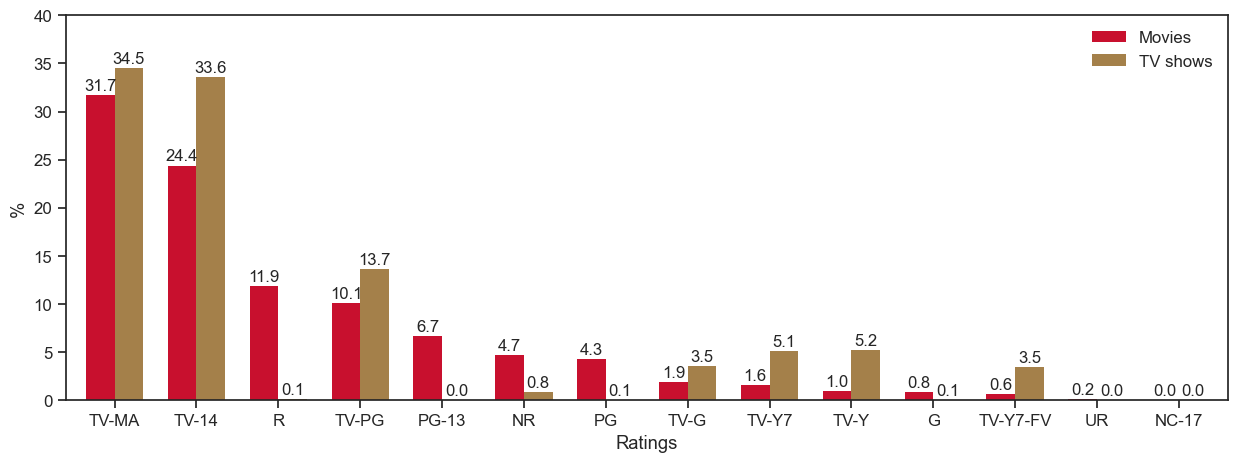

In [71]:
plot = df.plot.bar(x='rating', 
                   y=['N', 'M'],
                   rot=0,
                   figsize=(15, 5),
                   ylim=(0, 40),
                   xlabel='Ratings',
                   ylabel='%',
                   edgecolor='black',
                   width=0.7)

for p in plot.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    value = '{:.1f}'.format(float(p.get_height()))
    plot.text(x, y, value, ha='center', size=12)

plot.legend(labels=['Movies', 'TV shows']);

Or try that way:

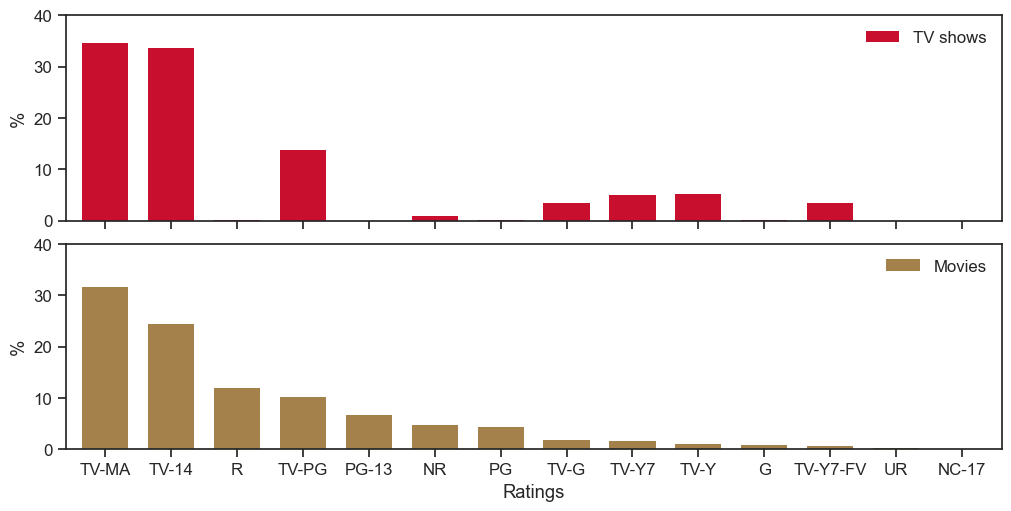

In [74]:
figure, axes = plt.subplots(2, 1, 
                            sharex=True, 
                            constrained_layout=True, 
                            figsize=(10, 5))

moviesP = df.plot.bar(x='rating', 
                      y='N',
                      ax=axes[1],
                      rot=0,
                      ylim=(0, 40),
                      xlabel='Ratings',
                      ylabel='%',
                      edgecolor='black',
                      width=0.7,
                      color='#A4804A')

showsP = df.plot.bar(x='rating', 
                     y='M',
                     ax=axes[0],
                     rot=0,
                     ylim=(0, 40),
                     ylabel='%',
                     edgecolor='black',
                     width=0.7,
                     color='#C8102E')

moviesP.legend(labels=['Movies'])
showsP.legend(labels=['TV shows']);

### ### I.(c) `seaborn` library:  Lines plots

Let's try an example:

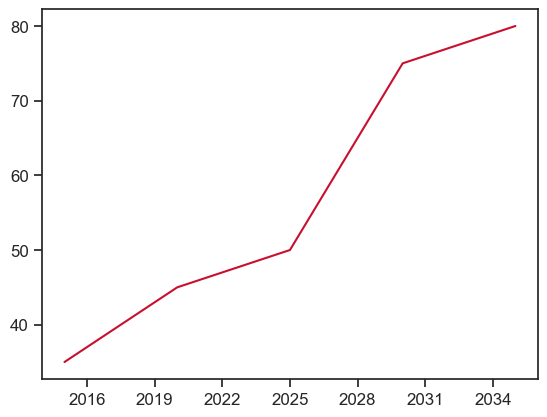

In [77]:
years = [2015, 2020, 2025, 2030, 2035]
values = [35, 45, 50, 75, 80]

graph = sns.lineplot(x=years, y=values)
graph.xaxis.set_major_locator(MaxNLocator(integer=True))



### ### I.(d) `seaborn` library: Scatter plots

Try to draw a scatter plot:

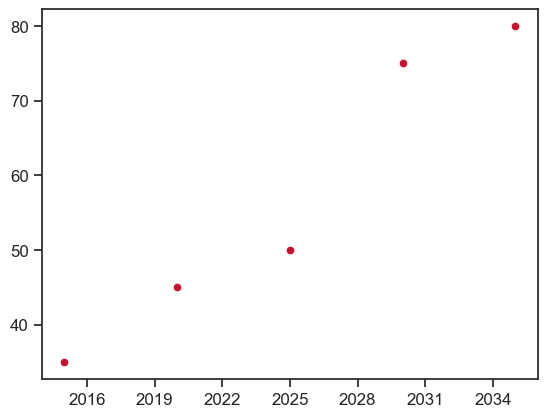

In [80]:
graph = sns.scatterplot(x=years, y=values)
graph.xaxis.set_major_locator(MaxNLocator(integer=True))


## II. `plotly` library

Plotly is an interactive visualisation library. Your can find more information here:

* https://plot.ly/python/

* https://plot.ly/python/getting-started/

You can install it like so:

```
for windows:

(base) $ conda install plotly

or for MacOS:

(base) $ pip install plotly 
```

__Plotly express__ is a simplified library around `plotly` graph objects. It enables easy and rapid visualisations of `pandas` data frames. More information can be found here:

* https://plot.ly/python/plotly-express/


In [83]:
import plotly.express as px

pd.options.display.precision = 2

### II.(a) Using `plotly` library to draw bar plots

In [86]:
data = pd.read_csv("sample-grades.csv")

data

,name,course,ex,ae
0,Alex,A,85,100
1,Alex,B,76,55
2,Alex,C,43,80
3,Alex,D,95,70
4,Jane,A,100,65
5,Jane,B,100,100
6,Jane,C,95,50
7,Jane,D,100,85
8,John,A,65,65
9,John,B,65,100


In [88]:
groups = data.groupby('course').mean(numeric_only=True).reset_index()
groups

,course,ex,ae
0,A,83.33,76.67
1,B,80.33,85.00
2,C,67.67,76.67
3,D,86.67,76.67


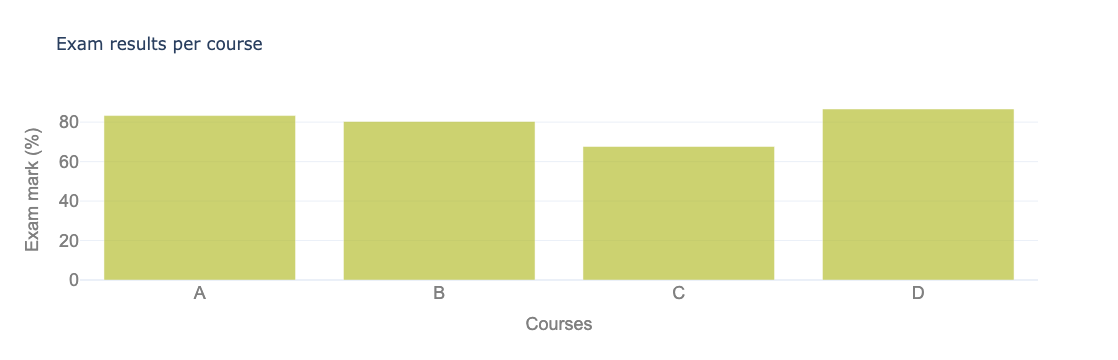

In [90]:
figure = px.bar(groups,
                x='course',
                y='ex',
                labels={'course': 'Courses', 'ex': 'Exam mark (%)'},
                title='Exam results per course',
                template='plotly_white',
                opacity=.7,
                hover_name='ex',
                hover_data=['ex'])

# Specify the colour of bars
figure.update_traces(marker_color="#B7BF35")

# Modify axis label properties
figure.update_xaxes(title_font={"size":18, "family": "Arial", "color":"gray"}, 
                    tickfont={"size":18, "family": "Arial", "color":"gray"})

figure.update_yaxes(title_font={"size":18, "family": "Arial", "color":"gray"}, 
                    tickfont={"size":18, "family": "Arial", "color":"gray"})

figure.show()

Let's try plotting multiple columns:

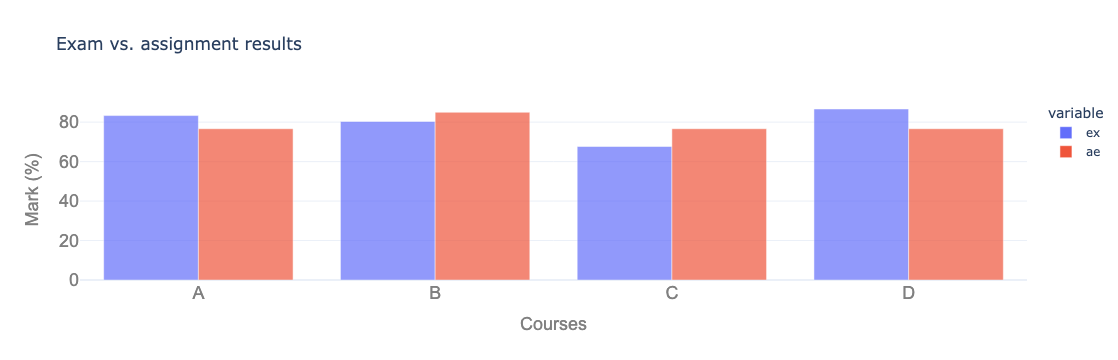

In [93]:
figure = px.bar(groups, 
                x='course', 
                y=['ex', 'ae'], 
                barmode='group',
                template='plotly_white',
                title='Exam vs. assignment results',
                opacity=.7,
                labels={'course': 'Courses', 'value': 'Mark (%)'})
       
# Modify axis label properties
figure.update_xaxes(title_font={"size":18, "family": "Arial", "color":"gray"}, 
                    tickfont={"size":18, "family": "Arial", "color":"gray"})

figure.update_yaxes(title_font={"size":18, "family": "Arial", "color":"gray"}, 
                    tickfont={"size":18, "family": "Arial", "color":"gray"})

figure.show()

### II.(b)  Using `plotly` library to draw line plots 

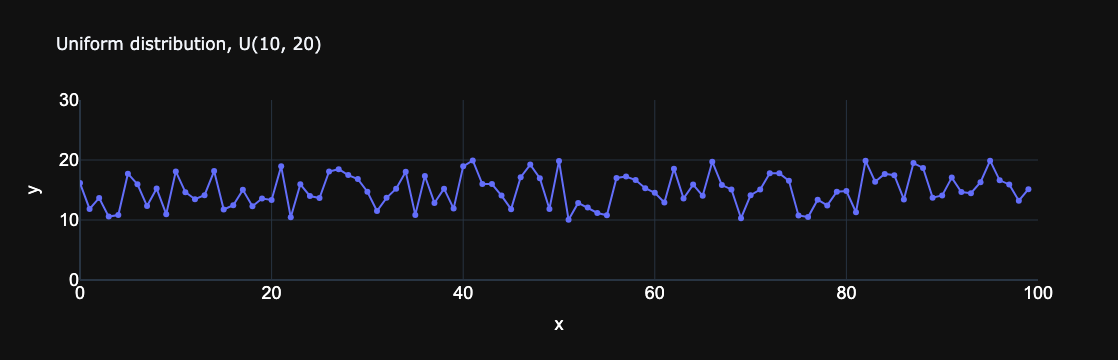

In [96]:
import numpy as np


data = {
    'x': np.arange(0, 100),
    'y': np.random.uniform(low=10., high=20., size=100)
}

df = pd.DataFrame(data)

figure = px.line(df,
                 x="x",
                 y="y", 
                 title='Uniform distribution, U(10, 20)', 
                 template="plotly_dark")

figure.update_traces(mode="lines+markers")

# Modify axis label properties
figure.update_xaxes(range=[0, 100], 
                    title_font={"size":18, "family": "Arial", "color":"white"}, 
                    tickfont={"size":18, "family": "Arial", "color":"white"})

figure.update_yaxes(range=[0, 30],
                    title_font={"size":18, "family": "Arial", "color":"white"}, 
                    tickfont={"size":18, "family": "Arial", "color":"white"})

figure.show()